In [1]:
import pandas as pd 
df=pd.read_csv("C:\\Users\\lenovo\\Downloads\\IMDB Dataset\\ram.csv")
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_56280\492388782.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,publishedTime,simpleText,votes,author,isReply,isHearted,isPinned,isPaid,paidAmount,isSponsor,sponsorshipMonths
0,23-02-2024,"The best one I heard today was this quip: ""Re...",97,@EssKay7023,False,False,False,False,NaN,False,NaN
1,23-02-2024,The politicians have mixed with peaceful commu...,0,@adityastyles259,True,False,False,False,NaN,False,NaN
2,23-02-2024,Government change hone ke baad mandir banane k...,4,@cinemagicworld6562,False,False,False,False,NaN,False,NaN
3,23-02-2024,😂🤣😂🤣,2,@haraharahara6350,False,False,False,False,NaN,False,NaN
4,23-02-2024,"Tum logonkaa dhandha ab nahi chalega , i know ...",2,@Anjing-Koththadimai,False,False,False,False,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1121,18-02-2024,This video deserves millions + views,0,@pavanawasthi8258,False,False,False,False,NaN,False,NaN
1122,18-02-2024,Jai Shree Sita Ram 🙏🙏❤️❤️,0,@NirajKumar-ys9ld,False,False,False,False,NaN,False,NaN
1123,18-02-2024,5:58 Maharshi Valmiki was the writter of ramay...,0,@abhigyan7739,False,False,False,False,NaN,False,NaN
1124,18-02-2024,🚩JAI SHREE RAM 🚩,0,@mr.reviewbaz90,False,False,False,False,NaN,False,NaN


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
def get_vader_sentiment(simpleText):
    score = analyzer.polarity_scores(simpleText)
    compound = score['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [4]:
df['sentiment'] = df['simpleText'].apply(get_vader_sentiment)

In [5]:
df.head(10)

,publishedTime,simpleText,votes,author,isReply,isHearted,isPinned,isPaid,paidAmount,isSponsor,sponsorshipMonths,sentiment
0,23-02-2024,"The best one I heard today was this quip: ""Re...",97,@EssKay7023,False,False,False,False,NaN,False,NaN,positive
1,23-02-2024,The politicians have mixed with peaceful commu...,0,@adityastyles259,True,False,False,False,NaN,False,NaN,positive
2,23-02-2024,Government change hone ke baad mandir banane k...,4,@cinemagicworld6562,False,False,False,False,NaN,False,NaN,positive
3,23-02-2024,😂🤣😂🤣,2,@haraharahara6350,False,False,False,False,NaN,False,NaN,positive
4,23-02-2024,"Tum logonkaa dhandha ab nahi chalega , i know ...",2,@Anjing-Koththadimai,False,False,False,False,NaN,False,NaN,negative
5,23-02-2024,WAAH RE HINDU WAAH JO TUMHARA DHARM KO PAKAR K...,0,@E4X_JOD,True,False,False,False,NaN,False,NaN,positive
6,23-02-2024,आपके नही आने से कोई फर्क नही पड़ा। हो गया राम ल...,2,@sureshrathore7519,False,False,False,False,NaN,False,NaN,neutral
7,23-02-2024,Ha Tum French Cut Rakho .😂😂😂😂,2,@dolphinindia2608,False,False,False,False,NaN,False,NaN,positive
8,23-02-2024,Exactly... Itna shor aur hungama to tab nahi h...,2,@bharatrao7021,False,False,False,False,NaN,False,NaN,neutral
9,23-02-2024,Who the f😮ck is that guy,1,@NolanGraysonNowl,False,False,False,False,NaN,False,NaN,neutral


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['simpleText'], df['sentiment'], test_size=0.2, random_state=42)

# Create a pipeline that vectorizes the data then applies Naive Bayes
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
print(model.score(X_test, y_test))

0.5707964601769911


In [8]:
import pickle

# Save the trained model
with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)


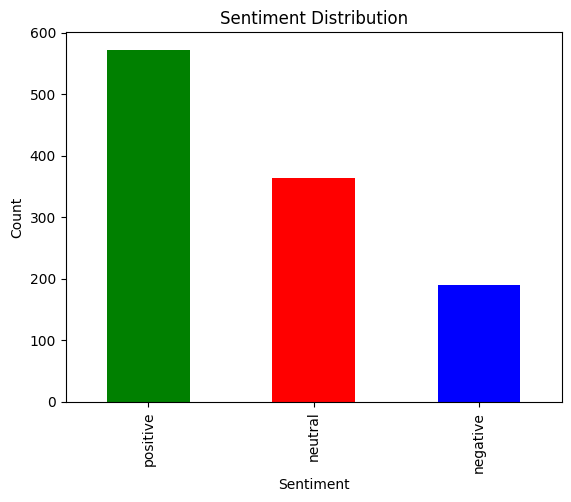

In [9]:
import matplotlib.pyplot as plt
def plot_sentiment_distribution(sentiment_series, title):
    sentiment_counts = sentiment_series.value_counts()
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# Plot VADER sentiment distribution
plot_sentiment_distribution(df['sentiment'], 'Sentiment Distribution')